In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import calendar

In [2]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [3]:
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


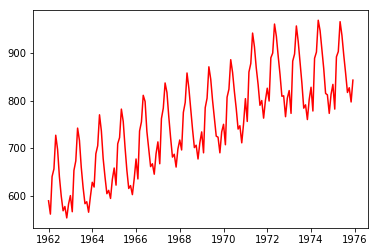

In [4]:
plt.plot (milk['milk'],c='r')
plt.show()

In [36]:
milk['mpm']=0

for i,ym in enumerate(zip(milk.index.year,milk.index.month)):
    milk.iloc[i,1]=milk.iloc[i,0]/calendar.monthrange(ym[0],ym[1])[1]

In [37]:
milk

,milk,mpm
month,,
1962-01-01,589,19.000000
1962-02-01,561,20.035714
1962-03-01,640,20.645161
1962-04-01,656,21.866667
1962-05-01,727,23.451613
1962-06-01,697,23.233333
1962-07-01,640,20.645161
1962-08-01,599,19.322581
1962-09-01,568,18.933333


In [57]:
milk['daily_diff1'] = milk.mpm - milk.mpm.shift(1)
milk['daily_diff12'] = milk.mpm - milk.mpm.shift(12)
milk['daily_diff121'] = milk.daily_diff12 - milk.daily_diff12.shift(1)
milk

,milk,mpm,daily_diff1,daily_diff12,daily_diff121
month,,,,,
1962-01-01,589,19.000000,NaN,NaN,NaN
1962-02-01,561,20.035714,1.035714,NaN,NaN
1962-03-01,640,20.645161,0.609447,NaN,NaN
1962-04-01,656,21.866667,1.221505,NaN,NaN
1962-05-01,727,23.451613,1.584946,NaN,NaN
1962-06-01,697,23.233333,-0.218280,NaN,NaN
1962-07-01,640,20.645161,-2.588172,NaN,NaN
1962-08-01,599,19.322581,-1.322581,NaN,NaN
1962-09-01,568,18.933333,-0.389247,NaN,NaN


In [58]:
print (sm.tsa.stattools.adfuller(milk['daily_diff1'].ravel()[1:])[1])
print (sm.tsa.stattools.adfuller(milk['daily_diff12'].ravel()[12:])[1])
print (sm.tsa.stattools.adfuller(milk['daily_diff121'].ravel()[13:])[1])

0.0643005465417
0.221276726588
2.2808455518e-06


array([-0.17626728,  0.24078341,  0.14731183, -0.0827957 ,  0.14946237,
        0.01182796, -0.06451613, -0.08064516, -0.17741935,  0.07741935,
        0.11612903,  0.38709677,  0.19283331,  0.03297314, -0.06236559,
       -0.16344086, -0.23655914, -0.08602151,  0.12903226, -0.00967742,
        0.07419355,  0.19247312,  0.19462366, -0.19354839, -0.06380105,
       -0.22652153, -0.11075269, -0.17956989,  0.27956989,  0.10752688,
       -0.32258065, -0.08494624, -0.04408602, -0.05591398, -0.2344086 ,
        0.58064516, -0.14861751,  0.40668203,  0.22903226, -0.16451613,
        0.46451613, -0.33548387,  0.35483871,  0.11397849, -0.04946237,
       -0.05053763,  0.27634409, -0.5483871 , -0.01843318, -0.30414747,
        0.12795699, -0.12795699, -0.20537634,  0.39892473, -0.22580645,
       -0.13978495, -0.02150538, -0.14516129, -0.17741935, -0.19354839,
        0.04953917,  0.24078341, -0.01935484,  0.27741935, -0.37741935,
        0.21612903,  0.06451613,  0.08602151, -0.05376344, -0.04

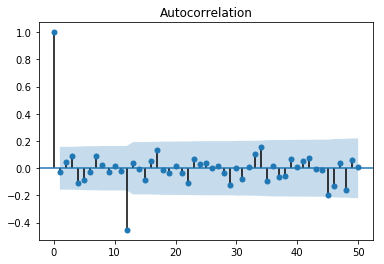

In [66]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(milk['daily_diff121'][13:].values.squeeze(), lags=50)

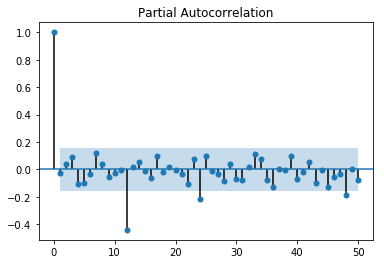

In [67]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(milk['daily_diff121'][13:].values.squeeze(), lags=50)

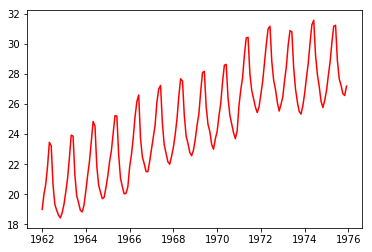

In [38]:
plt.plot (milk['mpm'],c='r')
plt.show()

In [47]:

result = sm.tsa.stattools.adfuller(milk['milk'].ravel())
round(result[1],2)

0.63

In [56]:
dim=milk.index.days_in_month

In [58]:
milk['milk_per_day']=milk['milk']/dim

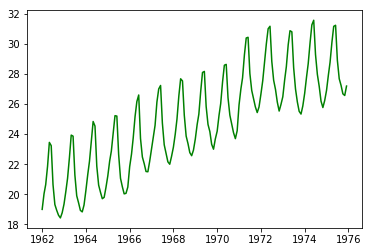

In [63]:
plt.plot (milk['milk_per_day'],c='g')
plt.show()

In [65]:
round(milk.milk_per_day.sum(),2)

4166.33